In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Using TensorFlow backend.


In [3]:
df = pd.read_csv('Amreli NRM data for model building1.csv')
# campaign = np.unique(df['campaign'])

# for c in campaign:
#     dfc = df[df['campaign']==c]
#     i = dfc.index[0]
#     df = df.drop(i)
df = df[df['Heat number (life number)']>1]    
df = df.reset_index(drop=True)
df['Number of capacitors removed'].fillna(0, inplace=True)


In [4]:
df.columns

Index(['campaign', 'Heat number (life number)',
       'Total Heat Time previous (minutes)', 'Total Heat Time (minutes)',
       'Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)',
       'Input (MT)', 'Final C%', 'Tapping Temperature (C)', 'Output (MT)',
       'Input energy previous (KWH)', 'Input energy (KWH)', 'Previous Voltage',
       'Previous Frequency', 'Previous Rating of the Furnace', 'Voltage',
       'Frequency', 'Rating of the furnace (KW)', 'Melt rate (MT/Hr)',
       'Efficiency (MT/KWH)', 'Number of capacitors removed',
       'Refractory lining before heating', 'Refractory lining after heating'],
      dtype='object')

# Model 5: All inputs and All outputs 

In [5]:
input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Previous Voltage', 'Total Heat Time previous (minutes)',
                 'Previous Frequency','Previous Rating of the Furnace', 'Refractory lining before heating','Number of capacitors removed','Tapping Temperature (C)','Input energy previous (KWH)']
output_columns = ['Efficiency (MT/KWH)','Total Heat Time (minutes)','Voltage','Frequency','Refractory lining after heating']

# input_columns = ['Input (MT)','Previous Voltage', 
#                  'Previous Frequency','Previous Rating of the Furnace', 'Refractory lining before heating','Tapping Temperature (C)']
# output_columns = ['Efficiency (MT/KWH)','Total Heat Time (minutes)','Voltage','Frequency','Refractory lining after heating']

In [6]:
X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

In [7]:
X_train.shape

(318, 12)

In [8]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()

normalized_X_train = scaler1.fit_transform(X_train)
normalized_X_test = scaler1.transform(X_test)

scaler2 = MinMaxScaler()
normalized_y_train = scaler2.fit_transform(y_train)
normalized_y_test = scaler2.transform(y_test)

In [9]:
## Keras NN
## model = Sequential()
n_input = X_train.shape[1] # number of features
n_hidden_1 = 500
n_hidden_2 = 100
n_hidden_3 = 50
n_hidden_4 = 150
n_hidden_5 = 100
n_hidden_6 = 50
n_hidden_7 = 25
num_digits = 5
n_output = 5

Inp = Input(shape=(n_input,))
x = Dense(n_hidden_1, activation='relu')(Inp)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
# x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
# x = Dense(n_hidden_5, activation='relu', name = "Hidden_Layer_5")(x)
# x = Dense(n_hidden_6, activation='relu', name = "Hidden_Layer_6")(x)
# x = Dense(n_hidden_7, activation='relu', name = "Hidden_Layer_7")(x)

output = Dense(num_digits, activation='linear', name = "Output_Layer")(x)
    
model = Model(Inp, output)
model.summary() 
learning_rate = 0.001
training_epochs = 500
batch_size = 5
sgd = optimizers.SGD(lr=learning_rate)
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer='adam',
                  metrics=['mse'])
    
history = model.fit(normalized_X_train, normalized_y_train,
                         batch_size = batch_size,
                         epochs = training_epochs,
                         verbose = 2)


pred_train = model.predict(normalized_X_train)
y_pred_train = scaler2.inverse_transform(pred_train)
pred_test = model.predict(normalized_X_test)
y_pred_test = scaler2.inverse_transform(pred_test)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               6500      
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               50100     
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 50)                5050      
_________________________________________________________________
Output_Layer (Dense)         (None, 5)                 255       
Total params: 61,905
Trainable params: 61,905
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
 - 1s - loss: 0.0424 - mse: 0.0424
Epoch 2/500
 - 0s - loss: 0.0075 - mse: 0.0075
Epoch 3/500
 - 0s - loss: 0

Epoch 150/500
 - 0s - loss: 0.0022 - mse: 0.0022
Epoch 151/500
 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 152/500
 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 153/500
 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 154/500
 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 155/500
 - 0s - loss: 0.0023 - mse: 0.0023
Epoch 156/500
 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 157/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 158/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 159/500
 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 160/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 161/500
 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 162/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 163/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 164/500
 - 0s - loss: 0.0022 - mse: 0.0022
Epoch 165/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 166/500
 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 167/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 168/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 169/500
 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 170/500
 - 0s 

Epoch 315/500
 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 316/500
 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 317/500
 - 0s - loss: 9.3861e-04 - mse: 9.3861e-04
Epoch 318/500
 - 0s - loss: 9.5282e-04 - mse: 9.5282e-04
Epoch 319/500
 - 0s - loss: 0.0010 - mse: 0.0010
Epoch 320/500
 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 321/500
 - 0s - loss: 9.0867e-04 - mse: 9.0867e-04
Epoch 322/500
 - 0s - loss: 8.2269e-04 - mse: 8.2269e-04
Epoch 323/500
 - 0s - loss: 9.9152e-04 - mse: 9.9152e-04
Epoch 324/500
 - 0s - loss: 0.0010 - mse: 0.0010
Epoch 325/500
 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 326/500
 - 0s - loss: 0.0014 - mse: 0.0014
Epoch 327/500
 - 0s - loss: 0.0012 - mse: 0.0012
Epoch 328/500
 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 329/500
 - 0s - loss: 8.9636e-04 - mse: 8.9636e-04
Epoch 330/500
 - 0s - loss: 7.2537e-04 - mse: 7.2537e-04
Epoch 331/500
 - 0s - loss: 7.0889e-04 - mse: 7.0889e-04
Epoch 332/500
 - 0s - loss: 8.6983e-04 - mse: 8.6983e-04
Epoch 333/500
 - 0s - loss: 8.1314e-04 - mse: 

 - 0s - loss: 4.7851e-04 - mse: 4.7851e-04
Epoch 464/500
 - 0s - loss: 4.1645e-04 - mse: 4.1645e-04
Epoch 465/500
 - 0s - loss: 8.3703e-04 - mse: 8.3703e-04
Epoch 466/500
 - 0s - loss: 9.3150e-04 - mse: 9.3150e-04
Epoch 467/500
 - 0s - loss: 7.6833e-04 - mse: 7.6833e-04
Epoch 468/500
 - 0s - loss: 0.0014 - mse: 0.0014
Epoch 469/500
 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 470/500
 - 0s - loss: 0.0011 - mse: 0.0011
Epoch 471/500
 - 0s - loss: 6.2238e-04 - mse: 6.2238e-04
Epoch 472/500
 - 0s - loss: 4.8232e-04 - mse: 4.8232e-04
Epoch 473/500
 - 0s - loss: 4.6455e-04 - mse: 4.6455e-04
Epoch 474/500
 - 0s - loss: 4.2213e-04 - mse: 4.2213e-04
Epoch 475/500
 - 0s - loss: 3.8683e-04 - mse: 3.8683e-04
Epoch 476/500
 - 0s - loss: 4.7253e-04 - mse: 4.7253e-04
Epoch 477/500
 - 0s - loss: 5.0799e-04 - mse: 5.0799e-04
Epoch 478/500
 - 0s - loss: 4.5194e-04 - mse: 4.5194e-04
Epoch 479/500
 - 0s - loss: 4.3846e-04 - mse: 4.3846e-04
Epoch 480/500
 - 0s - loss: 4.2722e-04 - mse: 4.2722e-04
Epoch 481/50

In [10]:
for i in range(num_digits):
    print(output_columns[i])
    print("Train score is {}".format(mean_squared_error(y_train[:,i], y_pred_train[:,i])))
    print("Test score is {}".format(mean_squared_error(y_test[:,i], y_pred_test[:,i])))
    print("R2 score is {}".format(r2_score(y_test[:,i], y_pred_test[:,i])))
    print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train[:,i]-y_train[:,i]))/np.sum(np.square(y_train[:,i]-np.mean(y_train[:,i])))*100))
    print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[:,i]-y_test[:,i]))/np.sum(np.square(y_test[:,i]-np.mean(y_test[:,i])))*100))
    print('\n')


Efficiency (MT/KWH)
Train score is 2.6119080060117288e-09
Test score is 9.252236909425793e-09
R2 score is -1.255402576453856
Train NMSE score is 9.187417108597879
Test NMSE score is 225.5402576453856


Total Heat Time (minutes)
Train score is 41.90951540469387
Test score is 991.0626840018973
R2 score is -0.7965991095163798
Train NMSE score is 8.324031454872282
Test NMSE score is 179.65991095163798


Voltage
Train score is 388.60432505663834
Test score is 7071.737023156686
R2 score is 0.7918462519152456
Train NMSE score is 1.4189786444225023
Test NMSE score is 20.815374808475436


Frequency
Train score is 3.572642482594593
Test score is 21.280471690252927
R2 score is 0.9733897381541425
Train NMSE score is 0.43808377824701167
Test NMSE score is 2.661026184585742


Refractory lining after heating
Train score is 0.001172117135551388
Test score is 0.0032916230862085633
R2 score is 0.9949156420441734
Train NMSE score is 0.18307047593066159
Test NMSE score is 0.5084357955826628




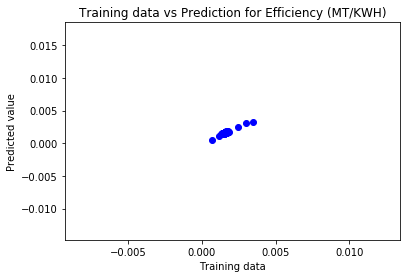

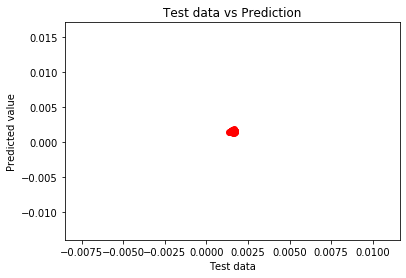

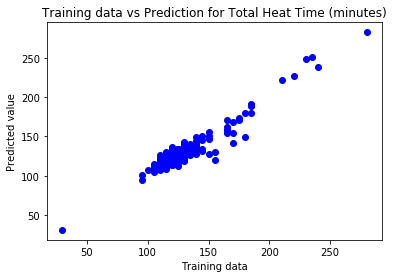

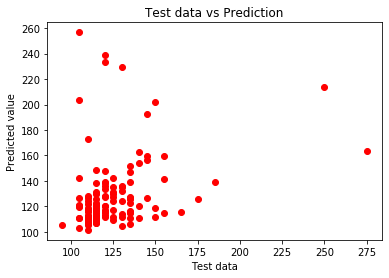

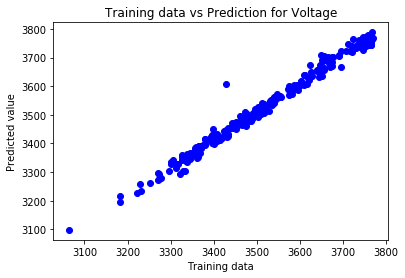

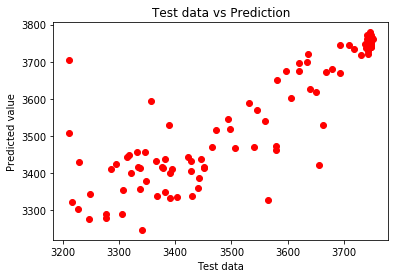

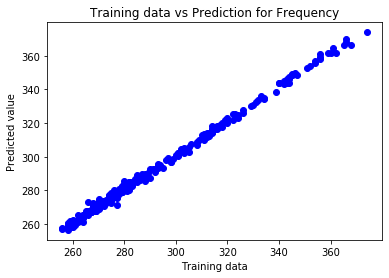

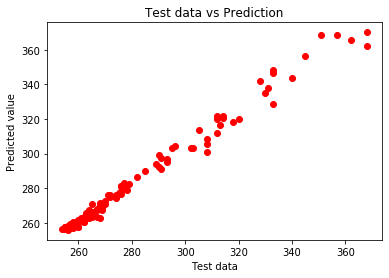

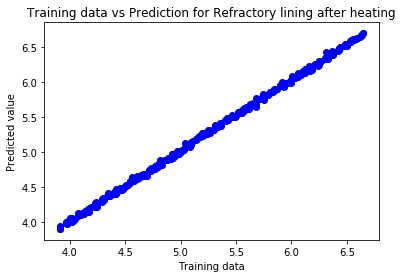

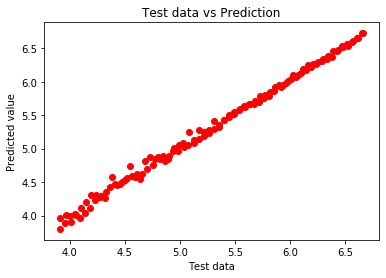

In [11]:
for i in range(num_digits):
    plt.scatter(y_train[:,i], y_pred_train[:,i], c='b');
    plt.xlabel('Training data')
    plt.ylabel('Predicted value')
    plt.title('Training data vs Prediction for {}'.format(output_columns[i]))
    plt.show()
    plt.scatter(y_test[:,i], y_pred_test[:,i], c='r');
    plt.xlabel('Test data')
    plt.ylabel('Predicted value')
    plt.title('Test data vs Prediction')
    plt.show()
